# Leren: Programming assignment 3
** This assignment can be done in teams of 2 **

**Student 1:**  <span style="color:red">Wim Berkelmans</span> (<span style="color:red">10793674</span>)<br>
**Student 2:** <span style="color:red">Philip Bouman</span> (<span style="color:red">10668667</span>)<br>

-----------------------------------
This notebook provides a template for your programming assignment 3. You may want to use parts of your code from the previous assignment(s) as a starting point for this assignment. 

The code you hand-in should follow the structure from this document. Each part of the assignment has its own cell, you are free to add more cells. Note that the structure corresponds with the structure from the actual programming assignment. Make sure you read this for the full explanation of what is expected of you.

**Submission:**

* Make sure your code can be run from top to bottom without errors.
* Include your data files in the zip file.
* Comment your code

One way be sure you code can be run without errors is by quiting iPython completely and then restart iPython and run all cells again (you can do this by going to the menu bar above: Cell > Run all). This way you make sure that no old definitions of functions or values of variables are left (that your program might still be using).

-----------------------------------

If you have any questions ask your teaching assistent. We are here for you.

-----------------------------------

## Regularized Logistic Regression
a) Implementation

In [71]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as linalg
import scipy.ndimage
import math

# load data from file
def readData():
    data = np.loadtxt('digits123.csv', delimiter=',');
    return data

# normalize designmatrix
def normalize(X):
    n = len(X[0])
    for i in range(1,n):
        max_value = np.amax(X[:,i])
        min_value = np.amin(X[:,i])
        mean_value = np.mean(X[:,i])
        mean_norm = np.subtract(X[:,i], mean_value)
        range_value = max_value - min_value
        X[:,i] = np.divide(mean_norm, range_value)
    return X

In [72]:
# hypothesis function for logistic regression
def hypothesis(thetas, x):
    return 1.0 / (1.0 + np.exp(-np.dot(thetas, x)))

# gradient and parameter updating
def updateLog(X, Y, Thetas, alpha, lamb):
    m = len(X)
    n = len(Thetas)
    
    new_thetas = np.zeros(n) 
    theta_temp = np.zeros(m)
    
    # loop over training examples
    for i in range(m):

        # loop over thetas/features
        for j in range(n):
            theta_temp[i] = 1.0 / (1.0 + np.exp(-np.sum(Thetas[:n] * X[i,:n]))) - Y[i]
            
    # apply regularization for theta_1 ... theta_n
    for i in range(1,n):
        Thetas[i] = Thetas[i] * (1 - alpha * (lamb / m))
        
    # calculate final thetas
    new_thetas = Thetas - alpha * 1/m * np.dot(X.T,theta_temp[:, np.newaxis])

    return new_thetas[:,0]

In [73]:
# cost function for logistic regression
def calcCostLog(thetas, lamb, X, Y):
    m = len(X)
    cost_sum = 0.0
    
    for i in range(m):
        if Y[i] > 0:
            cost_sum += math.log(hypothesis(thetas,X[i]))
        else:
            cost_sum += math.log(1 - hypothesis(thetas,X[i]))
            
    # remove theta_0 for regularization step
    thetas_alt = np.delete(thetas, 0)     
            
    # normalize and apply regularization
    return -(cost_sum/m) + lamb/2*m + np.sum(thetas_alt**2)

final cost:  2.51973890396
final thetas: [ 0.04680438 -0.00175084  0.04160639  0.02842189]


<function matplotlib.pyplot.show>

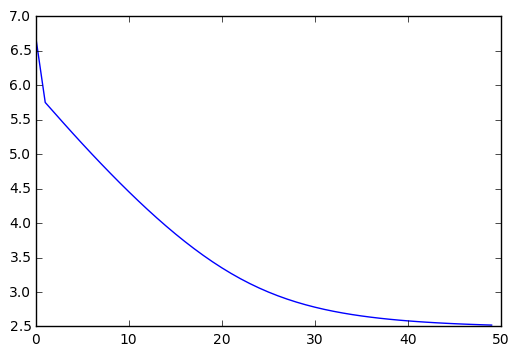

In [74]:
# function for logistic regression
def regressionLog(X, y, alpha, lamb, n_iter, thetas):
    cost = []
    # for number of iterations
    while n_iter > 0:
        # calculate cost
        cost.append(calcCostLog(thetas, lamb, X, y))
        # update values for theta
        new_thetas = updateLog(X, y, thetas, alpha, lamb)
        thetas = new_thetas        
        n_iter -= 1
    
    return new_thetas, cost

# input is data from assignment
X = np.array([[1,10,4,4],[1,7,3,3],[1,5,4,2],[1,2,3,1]])
Y = np.array([0,0,1,1])
thetas = np.array([0.5,0.5,0.5,0.5])

new_thetas, cost = regressionLog(X, Y, 0.03, 0.9, 50, thetas)
print "final cost: ", cost[-1]
print "final thetas:",new_thetas
plt.plot(cost)
plt.show

b) Two small datasets

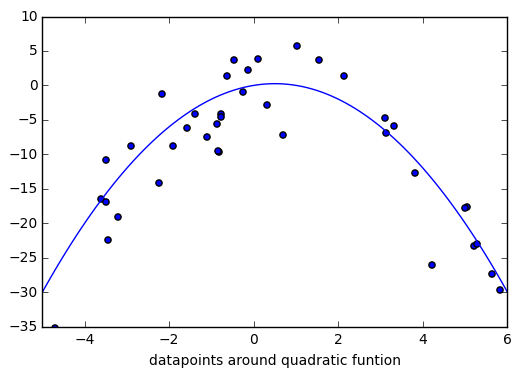

In [75]:
def quadraticFunction(x):
    return -x**2 + x

# create datapoints around a function and label them 1 or 0
# depending on the side they fall in
def createData(range_data, n_samples):
    
    # plot quadratic funtion (line)
    xvals = np.arange(-range_data-100,range_data+100,0.1)
    yvals = quadraticFunction(xvals)
    plt.plot(xvals, yvals)
    plt.show
    
    # create random datapoints
    x_1 = np.random.normal(0,range_data, n_samples)
    x_2 = np.zeros(len(x_1))
    y = np.zeros(len(x_1))
    
    # add noise to datapoints and determine output value (0 or 1)
    for i in range(len(x_1)):
        x_2[i] = quadraticFunction(x_1[i])
        random = np.random.normal(0,5,1)
        if random > 0:
            y[i] = 1
        else:
            y[i] = 0
        x_2[i] = x_2[i] + random

    # plot datapoints
    plt.scatter(x_1, x_2)
    plt.axis([-range_data,range_data+1 , -35, 10])
    plt.xlabel("datapoints around quadratic funtion")
    plt.show
    
    return x_1, x_2, y

# get datapoints
x_1, x_2, y = createData(5, 50)

# create sets with different terms
X = x_1[:, np.newaxis]
X = np.insert(X, 0, 1, axis=1)
X1 = normalize(X)
thetas1 = np.ones(len(X1[0]))

X = x_1[:, np.newaxis]
X = np.insert(X, 0, 1, axis=1)
X = np.insert(X, 2, x_2, axis=1)
X2 = normalize(X)
thetas2 = np.ones(len(X2[0]))

X = x_1[:, np.newaxis]
X = np.insert(X, 0, 1, axis=1)
X = np.insert(X, 2, x_2, axis=1)
X = np.insert(X, 3, x_1**2, axis=1)
X3 = normalize(X)
thetas3 = np.ones(len(X3[0]))

X = x_1[:, np.newaxis]
X = np.insert(X, 0, 1, axis=1)
X = np.insert(X, 2, x_2, axis=1)
X = np.insert(X, 3, x_1**2, axis=1)
X = np.insert(X, 3, x_2**2, axis=1)
X4 = normalize(X)
thetas4 = np.ones(len(X4[0]))


final cost:  23.2619361482
final thetas: [ 0.23965041  0.24049693]
final cost:  23.3266595474
final thetas: [ 0.24019839  0.24104883  0.24073405]
final cost:  23.3769228558
final thetas: [ 0.2399379   0.24078215  0.24049618  0.24105394]
final cost:  23.4328639754
final thetas: [ 0.24145985  0.24230283  0.24203987  0.2424821   0.24256048]


<function matplotlib.pyplot.show>

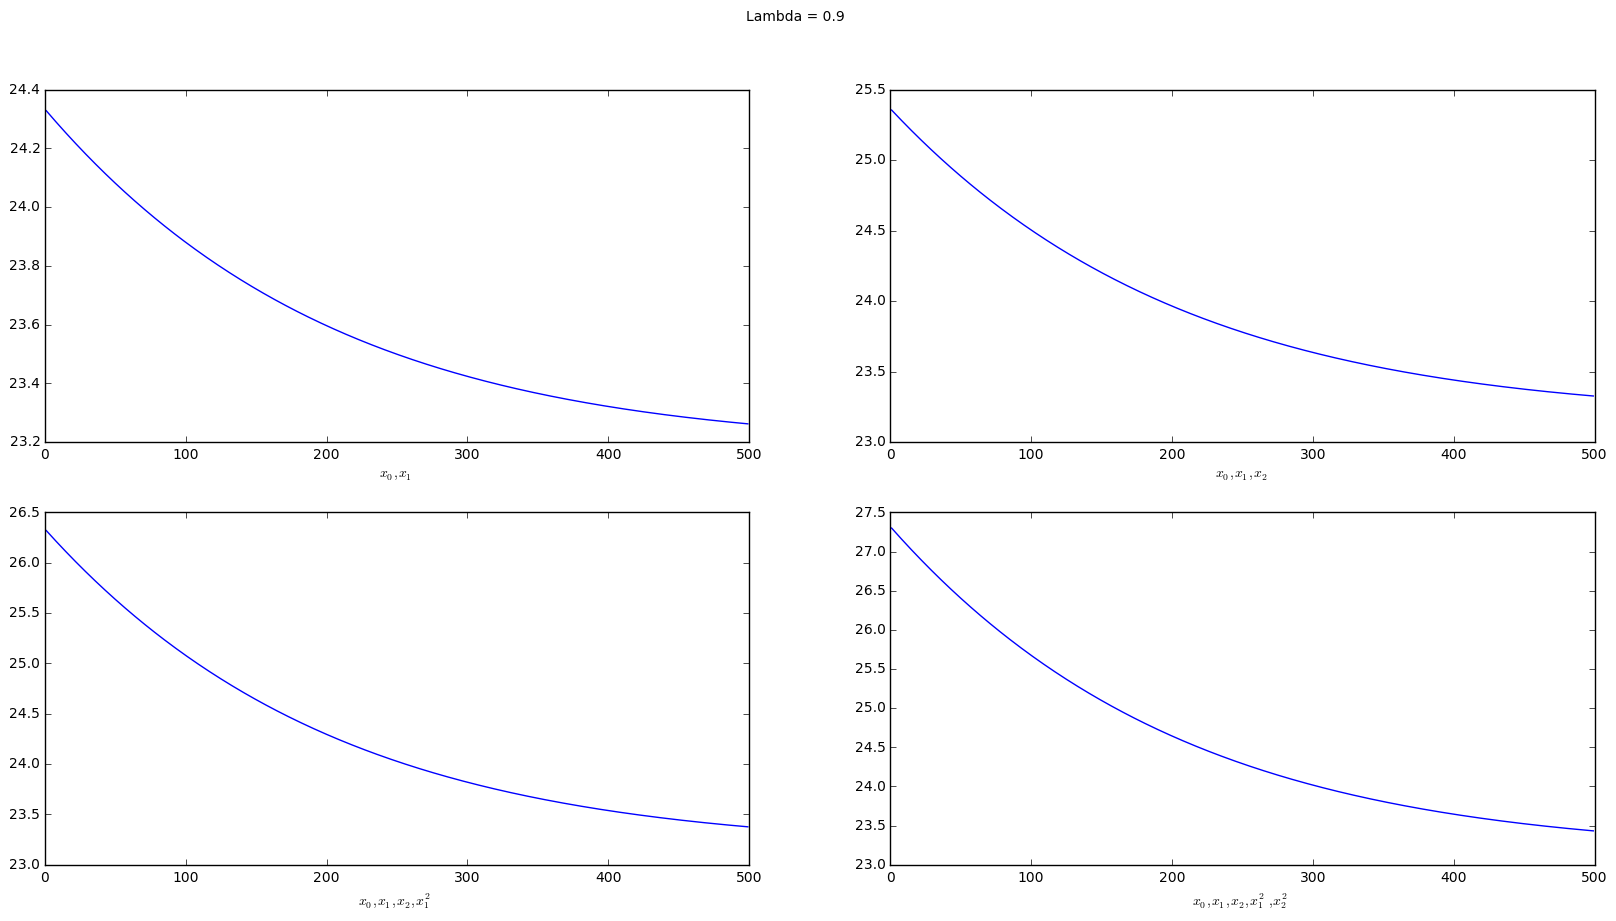

In [76]:
# plot results 1
plt.figure(figsize=(20, 10))
plt.suptitle("Lambda = 0.9")

n_iter = 500
alpha = 0.01
lamb = 0.9

# x_0 & x_1
new_thetas, cost = regressionLog(X1, y, alpha, lamb, n_iter, thetas1)
print "final cost: ", cost[-1]
print "final thetas:",new_thetas
plt.subplot(2,2,1)
plt.plot(cost)
plt.xlabel("${x_0, x_1}$ ")

# x_0 & x_1 & x_2
new_thetas, cost = regressionLog(X2, y, alpha, lamb, n_iter, thetas2)
print "final cost: ", cost[-1]
print "final thetas:",new_thetas
plt.subplot(2,2,2)
plt.plot(cost)
plt.xlabel("${x_0, x_1, x_2}$ ")

# x_0 & x_1 & x_2 & (x_1)^2
new_thetas, cost = regressionLog(X3, y, alpha, lamb, n_iter, thetas3)
print "final cost: ", cost[-1]
print "final thetas:",new_thetas
plt.subplot(2,2,3)
plt.plot(cost)
plt.xlabel("${x_0, x_1, x_2, x_1^2}$ ")

# x_0 & x_1 & x_2 & (x_1)^2 & (x_2)^2
new_thetas, cost = regressionLog(X4, y, alpha, lamb, n_iter, thetas4)
print "final cost: ", cost[-1]
print "final thetas:",new_thetas
plt.subplot(2,2,4)
plt.plot(cost)
plt.xlabel("${x_0, x_1, x_2, x_1^2, x_2^2}$ ")

plt.show

final cost:  8.26193614711
final thetas: [ 0.2396504   0.24049693]
final cost:  8.32665954425
final thetas: [ 0.24019839  0.24104882  0.24073404]
final cost:  8.37692285194
final thetas: [ 0.2399379   0.24078215  0.24049618  0.24105393]
final cost:  8.43286396576
final thetas: [ 0.24145984  0.24230282  0.24203986  0.24248209  0.24256047]


<function matplotlib.pyplot.show>

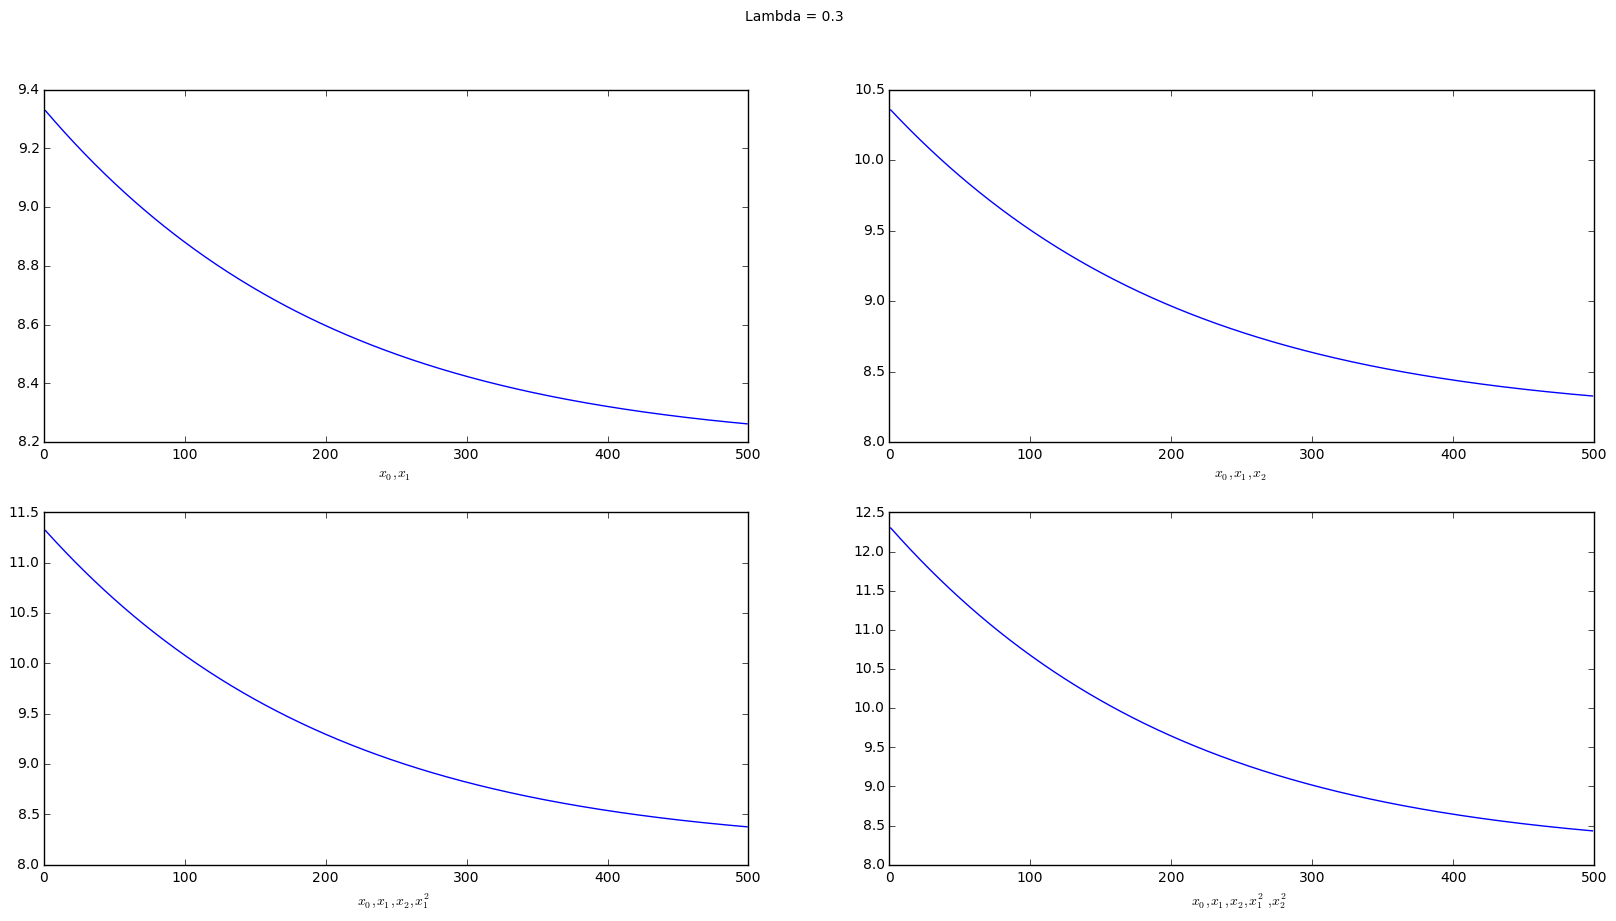

In [77]:
# plot results 2
plt.figure(figsize=(20, 10))
plt.suptitle("Lambda = 0.3")

n_iter = 500
alpha = 0.01
lamb = 0.3

# x_0 & x_1
new_thetas, cost = regressionLog(X1, y, alpha, lamb, n_iter, thetas1)
print "final cost: ", cost[-1]
print "final thetas:",new_thetas
plt.subplot(2,2,1)
plt.plot(cost)
plt.xlabel("${x_0, x_1}$ ")

# x_0 & x_1 & x_2
new_thetas, cost = regressionLog(X2, y, alpha, lamb, n_iter, thetas2)
print "final cost: ", cost[-1]
print "final thetas:",new_thetas
plt.subplot(2,2,2)
plt.plot(cost)
plt.xlabel("${x_0, x_1, x_2}$ ")

# x_0 & x_1 & x_2 & (x_1)^2
new_thetas, cost = regressionLog(X3, y, alpha, lamb, n_iter, thetas3)
print "final cost: ", cost[-1]
print "final thetas:",new_thetas
plt.subplot(2,2,3)
plt.plot(cost)
plt.xlabel("${x_0, x_1, x_2, x_1^2}$ ")

# x_0 & x_1 & x_2 & (x_1)^2 & (x_2)^2
new_thetas, cost = regressionLog(X4, y, alpha, lamb, n_iter, thetas4)
print "final cost: ", cost[-1]
print "final thetas:",new_thetas
plt.subplot(2,2,4)
plt.plot(cost)
plt.xlabel("${x_0, x_1, x_2, x_1^2, x_2^2}$ ")

plt.show

**Discussion:**

Increasing the number of (quadratic) terms increases the cost slightly. This effect seems to hold for either low or high values of lambda.

-----------------------------------

## 2) Neural Network


a) Forward Propagation

In [78]:
# sigmoid function
def sigmoid(x):
    return 1.0 / (1.0 + math.exp(-x))

def forwardProp(X,Thetas1,Thetas2): # no bias and 1 hidden layer
    # calculate for each example the activation of each hidden and each output node
    m = len(X) # number of examples
    n = len(X[0]) # number of variables = input nodes
    o = len(Thetas1[0]) # number of nodes in hidden layer
    p = len(Thetas2[0]) # number of output nodes
    z2 = np.zeros((m,o)) # sum of terms of hidden layer for each example/node
    z3 = np.zeros((m,p)) # sum of terms of output layer for each example/node
    a2 = np.zeros((m,o)) # activations of hidden layer for each example/node
    a3 = np.zeros((m,p)) # activations of output layer for each example/node
    for i in range(m): # for each example
        for j in range(o): # for each hidden node
            for k in range(n): # for each input node
                z2[i][j] += X[i][k] * Thetas1[k][j]
                
            a2[i][j] = sigmoid(z2[i][j])
                
        for j in range(p): # for each output node
            for k in range(o): # for each hidden node
                z3[i][j] += a2[i][k] * Thetas2[k][j]
                
            a3[i][j] = sigmoid(z3[i][j])
                      
    return a2, a3

In [79]:
# input is data from written assignment 3 without bias
X = [[-5]] # 1 example with 1 input value
Output = [[1]] # 1 output node
Thetas1 = [[0.2]] # thetas from input to hidden layer, 1 input node, 1 hidden node
Thetas2 = [[0.1]] # thetas from hidden to output layer, 1 hidden node, 1 output node

print "number of examples m = ",len(X)
print "number of input nodes n = ",len(X[0])
print "number of nodes in hidden layer o = ",len(Thetas1[0])
print "number of output nodes p = ",len(Thetas2[0])
a2, a3 = forwardProp(X,Thetas1,Thetas2)
print "activation for hidden node is ",a2[0][0]
print "activation for output node is ",a3[0][0]

number of examples m =  1
number of input nodes n =  1
number of nodes in hidden layer o =  1
number of output nodes p =  1
activation for hidden node is  0.26894142137
activation for output node is  0.506723130305


b) Backpropagation on two logistic units

In [80]:
def backProp(X,Output,Thetas2,a2,a3):
    m = len(X) # number of examples
    n = len(X[0]) # number of input nodes
    o = len(Thetas2) # number of nodes in the hidden layer
    p = len(Output[0]) # number of output nodes
    deltas2 = np.zeros((m,o)) # deltas of hidden layer for each example/node
    deltas3 = np.zeros((m,p)) # deltas of output layer for each example/node
    for i in range(m): # for each example
        for j in range(p):
            deltas3[i][j] = (a3[i][j] - Output[i][j]) * (1 - a3[i][j]) * a3[i][j]

        for j in range(o):
            for k in range(p):
                deltas2[i][j] += deltas3[i][k] * Thetas2[j][k] * (1 - a2[i][j]) * a2[i][j] 

    return deltas2, deltas3

In [81]:
def gradientsNN(X, a2, deltas2, deltas3):
    m = len(X) # number of examples
    n = len(X[0]) # number of input nodes
    o = len(deltas2[0]) # number of hidden nodes
    p = len(deltas3[0]) # number of output nodes
    gradients1 = np.zeros((n,o)) # gradients for thetas between input layer and hidden layer
    gradients2 = np.zeros((o,p)) # gradients for thetas between hidden layer and output layer
    for i in range(n):
        for j in range(o):
            for k in range(m):
                gradients1[i][j] += deltas2[k][j] * X[k][i]
                
            gradients1[i][j] = gradients1[i][j] / m
        
    for i in range(o):
        for j in range(p):
            for k in range(m):
                gradients2[i][j] += deltas3[k][j] * a2[k][i]
                
            gradients2[i][j] = gradients2[i][j] / m
        
    return gradients1, gradients2

In [82]:
# update thetas
def updateThetas(Thetas1,Thetas2,gradients1,gradients2,alpha):
    for i in range(len(Thetas1)): # for each input node
        for j in range(len(Thetas1[0])): # for each hidden node
            Thetas1[i][j] = Thetas1[i][j] - alpha * gradients1[i][j]

    for i in range(len(Thetas2)): # for each hidden node
        for j in range(len(Thetas2[0])): # for each output node
            Thetas2[i][j] = Thetas2[i][j] - alpha * gradients2[i][j]
    
    return Thetas1, Thetas2

In [83]:
# run forward and back propagation
def fbProp(X,Output,Thetas1,Thetas2,alpha):
    a2, a3 = forwardProp(X,Thetas1,Thetas2)

    deltas2, deltas3 = backProp(X,Output,Thetas2,a2,a3)

    # compute gradients
    gradients1, gradients2 = gradientsNN(X, a2, deltas2, deltas3)
    # update thetas
    Thetas1, Thetas2 = updateThetas(Thetas1,Thetas2,gradients1,gradients2,alpha)
    
    return Thetas1, Thetas2, a3

In [84]:
# input is data from written assignment 1 without bias
X = [[6],[5],[3]] # 3 examples with 1 input value
Output = [[5],[6],[10]]
Thetas1 = [[0.5]] # thetas from input to hidden layer, 1 input node, 1 hidden node
Thetas2 = [[0.5]] # thetas from hidden to output layer, 1 hidden node, 1 output node
alpha = 0.001

print "number of examples m = ",len(X)
print "number of input nodes n = ",len(X[0])
print "number of nodes in hidden layer o = ",len(Thetas1[0])
print "number of output nodes p = ",len(Thetas2[0])
Thetas1, Thetas2, a3 = fbProp(X,Output,Thetas1,Thetas2,alpha)
print "new Thetas1 = ", Thetas1[0][0]
print "new Thetas2 = ", Thetas2[0][0]

number of examples m =  3
number of input nodes n =  1
number of nodes in hidden layer o =  1
number of output nodes p =  1
new Thetas1 =  0.500289525192
new Thetas2 =  0.501336728547


c) Complete backpropagation on handwritten digit recognition

In [85]:
# read digits file
def readDigits():
    data = np.loadtxt('digits123.csv', delimiter=',');
    return data

In [86]:
# calculate cost
def costNN(Thetas1,Thetas2,Output,a3):
    m = len(X) # number of examples
    p = len(Thetas2[0]) # number of output nodes
    cost = 0
    for i in range(m):
        for j in range(p):
            cost += (a3[i][j] - Output[i][j])**2
            
    cost = cost / (2 * m)
    return cost

In [87]:
# init
Digits = readDigits()

Y = Digits[:,-1] # Y target values, last column of Digits
X = np.delete(Digits, -1, 1) # remove target values
X = np.insert(X, 0, 1, axis=1) # insert first column with ones, the bias
n_hidden = 20
Thetas1 = np.zeros((len(X[0]),n_hidden)) # thetas from input to hidden layer
Thetas2 = np.zeros((n_hidden,3)) # thetas from hidden to output layer
# init thetas 
t_init = 0.05
for i in range(64):
    for j in range(n_hidden):
        Thetas1[i][j] = t_init

for i in range(n_hidden):
    for j in range(3):
        Thetas2[i][j] = t_init

alpha = 0.1
m = len(Y) # number of examples
Target_vectors = np.zeros((m,3))
# convert target values (1,2,3) to vectors ([1,0,0],[0,1,0],[0,0,1])
for i in range(m):
    value = int(Y[i]) - 1
    Target_vectors[i][value] = 1

number of examples m =  542
number of input nodes n =  65
number of nodes in hidden layer o =  20
number of output nodes p =  3
cost after  0  iterations =  0.570611195749
cost after  1  iterations =  0.534141334262
cost after  2  iterations =  0.499222966671
cost after  3  iterations =  0.467309314495
cost after  4  iterations =  0.439452956062
cost after  5  iterations =  0.416131201366
cost after  6  iterations =  0.397269581633
cost after  7  iterations =  0.38240939717
cost after  8  iterations =  0.370910632226
cost after  9  iterations =  0.362110308335
cost after  10  iterations =  0.355412635088
cost after  11  iterations =  0.350323754971
cost after  12  iterations =  0.346453532729
cost after  13  iterations =  0.343502413484
cost after  14  iterations =  0.341244043247
cost after  15  iterations =  0.339508742599
cost after  16  iterations =  0.338169675314
cost after  17  iterations =  0.337131985449
cost after  18  iterations =  0.336324553314
cost after  19  iterations =

<function matplotlib.pyplot.show>

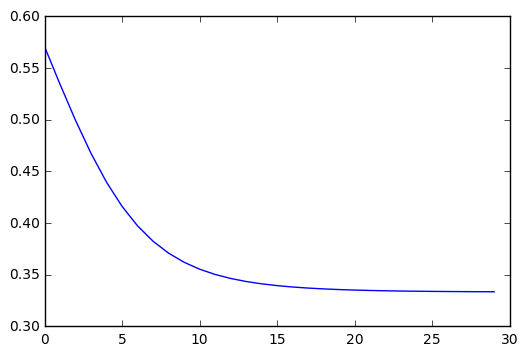

In [88]:
# iterate:
# 1. calculate activations with forward propagation
# 2. calculate deltas with back propagation
# 3. update thetas
# 4. calculate cost

print "number of examples m = ",len(X)
print "number of input nodes n = ",len(X[0])
print "number of nodes in hidden layer o = ",len(Thetas1[0])
print "number of output nodes p = ",len(Thetas2[0])
n_iter = 30
cost_iter = []
for i in range(n_iter):
    # forward and back propagation for digits and update thetas
    Thetas1, Thetas2, a3 = fbProp(X,Target_vectors,Thetas1,Thetas2,alpha)
    cost = costNN(Thetas1,Thetas2,Target_vectors,a3)
    print "cost after ",i, " iterations = ",cost
    cost_iter.append(cost)
    
plt.plot(cost_iter)
plt.show

**Discussion:**

I used both a hypothesis function with and without bias, but it does not seem to make a difference. The bias just adds a 65th pixel in the input.

Choosing good thetas is important. With all thetas = 0.5 the cost will start high and it takes a lot of iterations to make the cost converge.
Thetas equal to 0.05 and alpha = 0.1 show a nice convergence in 20-30 iterations. The lower the thetas, the lower the initial cost is. With thetas = 0.001 the initial cost is 0.376, which is close to the limit of the convergence, resulting in a less nice convergence curve.

A low alpha of 0.001 results in a slow descent. With alpha = 0.1 the cost shows a nice curve.
Higher alpha like 0.5 or 1 show a steep convergence to the limit, less smooth. 

-----------------------------------